In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
from footprint_poisson import footprint_poisson
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flags = tf.app.flags
FLAGS = flags.FLAGS
FLAGS.batch_size = 128

# define flags (note that Fomoro will not pass any flags by default)
# flags.DEFINE_boolean('skip-training', False, 'If true, skip training the model.')
# flags.DEFINE_boolean('restore', False, 'If true, restore the model from the latest checkpoint.')

# define artifact directories where results from the session can be saved
model_path = os.environ.get('MODEL_PATH', 'models/')
checkpoint_path = os.environ.get('CHECKPOINT_PATH', 'checkpoints/')
summary_path = os.environ.get('SUMMARY_PATH', 'logs/')

"paths to the data sets"
pivotdir = "../data/"
dbdir = "../data/"

#infile = pivotdir+ "IGTB1077.batf_disc1.offsets_1000_1.pivot.tab"
#nrows = None
#ydf = pd.read_table(infile, index_col=[0,1], nrows = nrows)

dbpath = dbdir + "batf_disc1.offsets_1000_1.pivot.db"
import sqlite3
conn = sqlite3.connect(dbpath)

from match_dna_atac import get_aligned_batch, get_loader
#from itertools import cycle
train_batchloader = get_loader(conn, where={"chr": "chr21"})
test_batchloader = get_loader(conn, where="chr = 'chr22'")

#sys.exit(1)
trainsamples = 4000

tfl = footprint_poisson(ALPHA = 2e-6,
        BATCH_SIZE = 2**8,
        dropout = False, xlen = 2001,
        display_step = 100,
        )

In [3]:
sess = tf.Session()
tfl._create_network()
tfl._load_(sess)
trvars = tf.trainable_variables()
trvars = {v.name:v for v in trvars}
print(trvars.keys())

pool2 (?, 1, 501, 64)


loading a session


dict_keys(['conv1/weights:0', 'local3/weights:0', 'conv1/biases:0', 'conv2/weights:0', 'conv2/biases:0', 'local3/biases:0'])


In [8]:
x = trvars['conv1/weights:0']
xval = x.eval(sess)

In [12]:
xval[0].transpose(2,1,0).shape

(64, 2, 5)

ValueError: too many values to unpack (expected 1)

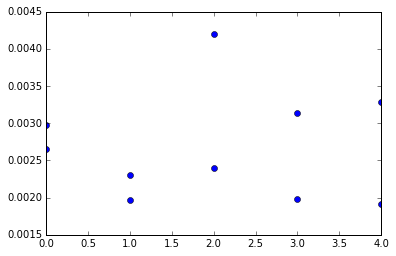

In [16]:
t = np.arange(5)
# plt.stem(t, xval[0].transpose(2,1,0)[0].T)
plt.stem(t, xval[0].transpose(2,1,0)[0].T,)